
### Flight Price Prediction 


####  The dataset is suitable for building machine learning models to predict flight ticket prices based on various features such as airline, date of journey, source and destination cities, route, and other factors.

#### A brief description of this dataset:

Size: The dataset contains information on 10,683 flight prices.

Features: The dataset includes 11 features:

Airline: The name of the airline carrier

Date_of_Journey: The date of the flight departure

Source: The city where the flight originates

Destination: The city where the flight terminates

Route: The route of the flight (e.g. DEL → BOM → COK)

Dep_Time: The scheduled departure time of the flight

Arrival_Time: The scheduled arrival time of the flight

Duration: The duration of the flight in hours and minutes

Total_Stops: The total number of stops in the flight

Additional_Info: Additional information about the flight

Price: The price of the flight ticket in Indian rupees (INR)

Target variable: The target variable is the flight ticket price (INR).

Data quality: The dataset is relatively clean and does not contain missing values, but some of the features may require preprocessing or feature engineering before they can be used in a machine learning model.

In [2]:
# Importing required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time, datetime               #to work with dates as date objects.       
import re                           #regular expression (or RE) specifies a set of strings that matches it;

In [3]:
# loading business class file in df named a

a = pd.read_csv("business.csv")
a.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [4]:
# loading economy class file in df named b

b = pd.read_csv("economy.csv")
b.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [5]:
#adding  the new feature named class

a["class"] = "business" 
b["class"] = "economy"

In [6]:
# appending two data sets and storing in the new data frame

new = b.append(a,ignore_index = True)
new.head(1)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy


In [7]:
# merging two columns (ch_code and "num_code") and making new feature flight

new.num_code = new.num_code.astype("str")
new["flight"] = new["ch_code"] +"-"+ new["num_code"]
new.drop(["ch_code","num_code"],axis = 1,inplace = True)

In [8]:
# renaming the featuers

new.rename({"dep_time": "departure_time", "from": "source_city", 
            "time_taken": "duration", "stop": "stops", "arr_time": "arrival_time",
           "to":"destination_city"}, axis = 1, inplace = True)

In [9]:
dd = pd.DataFrame(new["date"].str.split("-",expand = True).to_numpy().astype(int),columns = ["day","month","year"])
new["days_left"] = np.where(dd["month"] > 2, dd["day"] +18, np.where(dd["month"] == 2, dd["day"] -10, dd["day"]))
new.head(1)

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,11-02-2022,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709,1


In [10]:
# as we drived one feature on the basis of date so no need for this featue so we will drop it

new.drop("date",axis = 1,inplace = True)

In [11]:
# converting time into morning/noon/evening 

s = (pd.to_datetime(new["departure_time"]).dt.hour % 24 + 4) // 4               #give numbers from 1 to 6 #(return a series)
s.replace({1: 'Late Night', 2: 'Early Morning', 3: 'Morning', 
                      4: 'Afternoon', 5: 'Evening', 6: 'Night'} ,inplace = True) # to replace values 1:latenight to 6: night
new["departure_time"] = s 
new.head(1)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,SpiceJet,Evening,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709,1


In [12]:
# we also can get morning eveniing categories by making bins

#  our bins are (0,4,8,12,16,20,24) respected labels starts from "latenight" to "night"

temp = pd.DataFrame(new["arrival_time"].str.split(":",expand = True).to_numpy().astype(int), 
                    columns = ["hour","minute"])
new["arrival_time"] = pd.cut(x = temp["hour"], bins = 6, labels = 
                             ["Late Night","Early Morning","Morning", "Afternoon", "Evening", "Night"])
new.head(1)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,SpiceJet,Evening,Delhi,02h 10m,non-stop,Night,Mumbai,"5,953",economy,SG-8709,1


In [13]:
# making duration in float values by calculating only hours

temp = pd.DataFrame(new["duration"].str.split(expand = True).to_numpy().astype(str), 
                    columns = ["hour","minute"])
temp["hour"] = temp["hour"].apply(lambda x: re.sub("[^0-9]","",x)).astype(int)
temp["minute"] = temp["minute"].apply(lambda r: re.sub("[^0-9]","",r))    # we has no values in minute colum some where 
temp["minute"] = np.where(temp["minute"] == "", 0, temp["minute"])       # replaceing "" with 0
temp["minute"] = temp["minute"].astype(int)                             #converting data type
new["duration"] = np.around((temp["hour"] + (temp["minute"]/60)),2) #saving the total hours in duration feature
new.head(1)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,SpiceJet,Evening,Delhi,2.17,non-stop,Night,Mumbai,"5,953",economy,SG-8709,1


In [14]:
# making the stops in numeric data type by giving stops accordingly

new["stops"] = new["stops"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
new["stops"] = np.where(new["stops"] == "", 0, new["stops"]) # replacign "" with 0
new["stops"] = new["stops"].astype(int) # changing object to int
new.head(1)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,"5,953",economy,SG-8709,1


In [15]:
# removing noise from price column

new["price"] = new["price"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
new["price"] = new["price"].astype(int) # changing object to int
new.head(1)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,5953,economy,SG-8709,1


In [16]:
# arranging the features 

new = new[["airline","flight","source_city","departure_time","stops",
     "arrival_time","destination_city","class","duration","days_left","price"]]

In [17]:
#final data = Clean_Dataset.csv

new.head(20)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early Morning,0,Morning,Mumbai,economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early Morning,0,Early Morning,Mumbai,economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,0,Afternoon,Mumbai,economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,0,Morning,Mumbai,economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,0,Evening,Mumbai,economy,2.17,1,6060
8,GO FIRST,G8-334,Delhi,Morning,0,Morning,Mumbai,economy,2.17,1,5954
9,GO FIRST,G8-336,Delhi,Afternoon,0,Evening,Mumbai,economy,2.25,1,5954


#### using the Clean_Dataset.csv for predicting the Flight Prices 

In [18]:
# Lets see what is in the Data

df=pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [19]:
# Droping the useless column 'Unnamed: 0'

df=df.drop('Unnamed: 0',axis=1)

In [20]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [21]:
# A Quick Information abou the Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [22]:
df=df.drop('flight', axis=1)

In [23]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [24]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [25]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

Visualising Some Features:

1. Number of passengers per airline

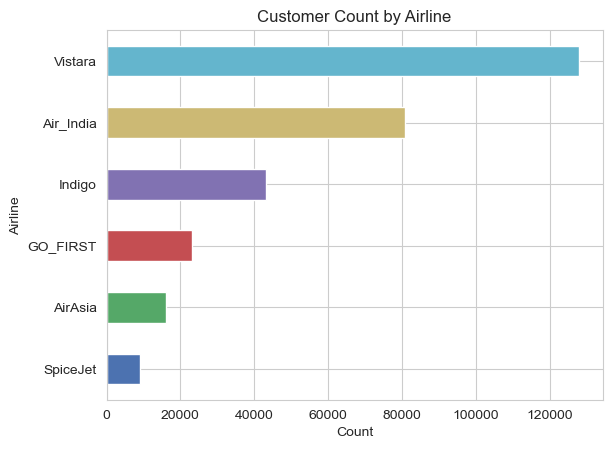

In [26]:
airline_counts = df['airline'].value_counts().sort_values(ascending=True)
sns.set_style("whitegrid")
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

# Create horizontal bar chart of airline counts

airline_counts.plot(kind='barh', color=colors)
plt.title("Customer Count by Airline")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

2. Average ticket price for each airline

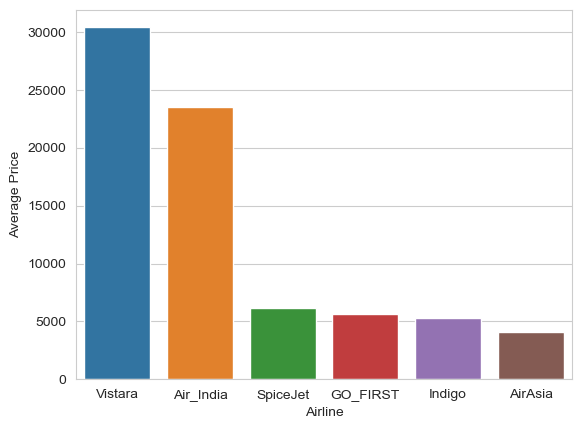

In [27]:
avg_price = df.groupby('airline')['price'].mean().reset_index()
avg_price = avg_price.sort_values(by='price',ascending=False)
sns.barplot(x='airline', y='price', data=avg_price)

plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

3. Number of passengers in Business and Economy Class

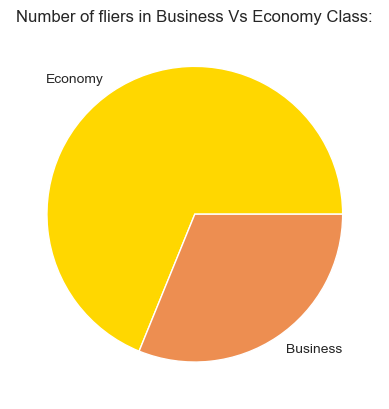

In [28]:

class_counts = df['class'].value_counts()
colors = ['#FFD700', '#ed8e51']
class_counts.plot(kind='pie', colors=colors)
plt.title("Number of fliers in Business Vs Economy Class:")
plt.ylabel('')
plt.show()

4. Ticket prices based on class

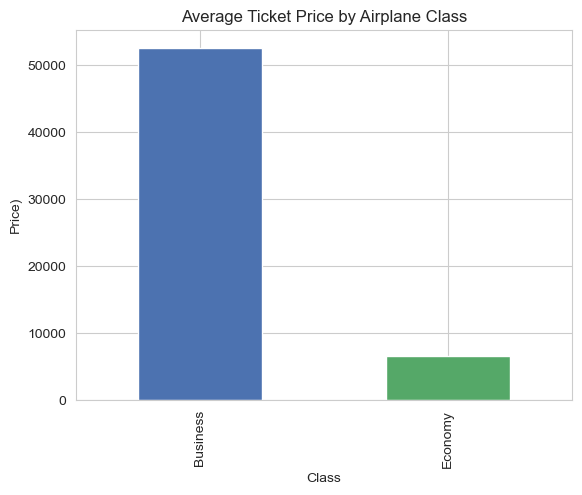

In [29]:

class_prices = df.groupby('class')['price'].mean()
sns.set_style("whitegrid")
class_prices.plot(kind='bar', color=['#4C72B0', '#55A868'])
plt.title("Average Ticket Price by Airplane Class")
plt.xlabel("Class")
plt.ylabel("Price)")
plt.show()

5. Ticket prices based on duration of flight

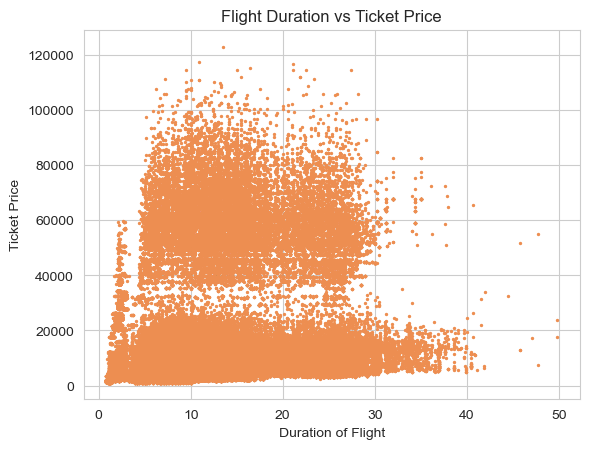

In [30]:

plt.scatter(df['duration'], df['price'], s=2, color= '#ed8e51')

plt.title("Flight Duration vs Ticket Price")
plt.xlabel("Duration of Flight")
plt.ylabel("Ticket Price")
plt.show()

6. Relation between number of stops for a flight and the flight ticket price

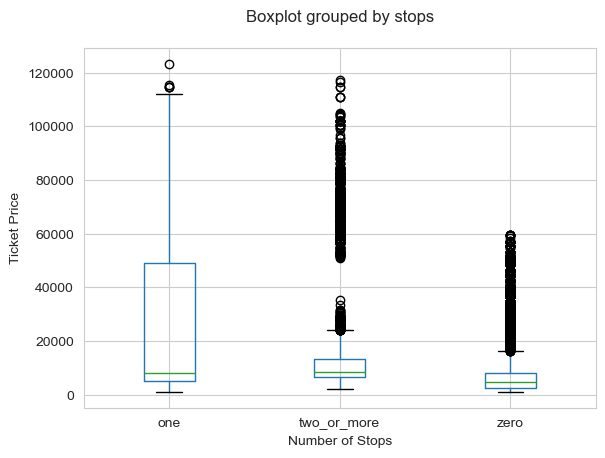

In [31]:
# Create box plot of number of stops vs ticket price
df.boxplot(column='price', by='stops')

plt.title("")
plt.xlabel("Number of Stops")
plt.ylabel("Ticket Price")
plt.show()

Identifying the categorical features:

In [32]:
# capturing those of type *object*

cat_cols = list(df.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 7
Categorical columns:
['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


Identifying numerical columns:

In [33]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_cols)

['duration', 'days_left', 'price']


In [34]:
## Checking for missing values:

features_with_na = [col for col in df.columns if df[col].isna().sum() > 0]

missing_values_df = pd.DataFrame(df[features_with_na].isnull().mean().sort_values(ascending=False), columns=["percentage"])
missing_values_df.head(10)

,percentage


In [35]:
df.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

This dataset has no missing values.

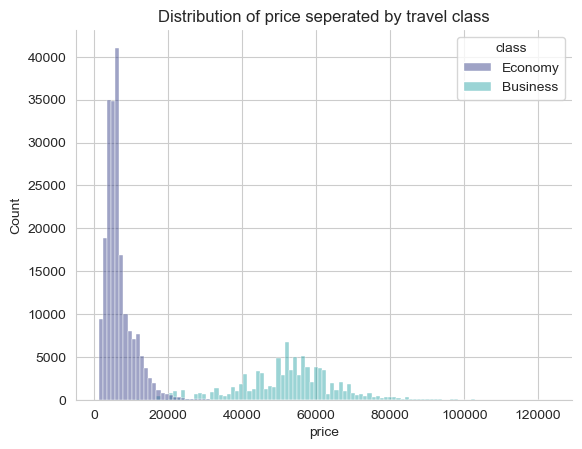

In [36]:
sns.histplot(x = "price", hue = "class", data = df, color = ["green", "blue"], alpha =.5, palette = "mako")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Distribution of price seperated by travel class")
plt.show()

In [37]:
# OUTLIER DETECTION

# Calculate median absolute deviation (MAD) of the dataset
mad = np.median(np.abs(df['price'] - np.median(df['price'])))

# Calculate modified z-scores for each data point
modified_z_scores = 0.6745 * (df['price'] - np.median(df['price'])) / mad

# Define a threshold for outliers (e.g., modified z-score greater than 3.5)
threshold = 3.5

# Identify the outliers
outliers = df[abs(modified_z_scores) > threshold]

print("Outliers:", outliers)

# Calculate the percentage of outliers
outlier_percentage = len(outliers) / len(df) * 100

print("Percentage of outliers:", outlier_percentage)

# Calculate the mean and standard deviation of the price column
mean = np.mean(df['price'])
std_dev = np.std(df['price'])

# Calculate the z-scores for each data point
z_scores = (df['price'] - mean) / std_dev
# Remove the outliers
outliers_removed = df[abs(z_scores) <= threshold]

# Save the cleaned dataset to a new CSV file
outliers_removed.to_csv('flight_data_cleaned.csv', index=False)

Outliers:           airline source_city departure_time stops arrival_time  \
117     Air_India       Delhi        Morning   one      Evening   
249       Vistara       Delhi  Early_Morning   one        Night   
250     Air_India       Delhi        Morning   one      Evening   
396     Air_India       Delhi        Morning   one      Evening   
397     Air_India       Delhi      Afternoon   one        Night   
...           ...         ...            ...   ...          ...   
300148    Vistara     Chennai        Morning   one      Evening   
300149    Vistara     Chennai      Afternoon   one        Night   
300150    Vistara     Chennai  Early_Morning   one        Night   
300151    Vistara     Chennai  Early_Morning   one      Evening   
300152    Vistara     Chennai        Morning   one      Evening   

       destination_city     class  duration  days_left  price  
117              Mumbai   Economy      6.08          1  29580  
249              Mumbai   Economy     13.83          2  2

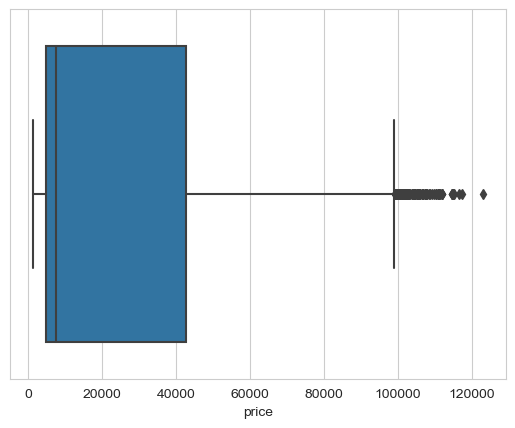

In [38]:
# Create a box plot of the price column - outliers represntation
sns.boxplot(x=df['price'])

# Display the plot
plt.show()

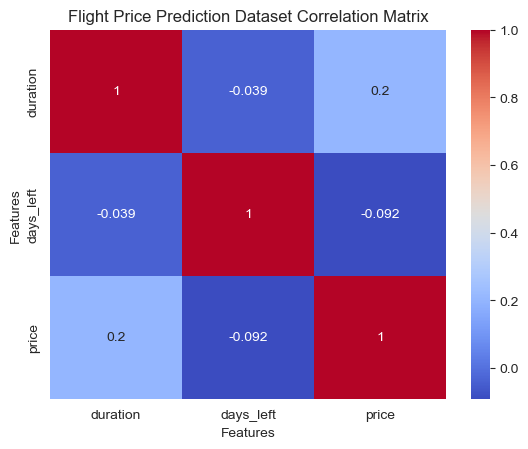

In [39]:

# HeatMap
# Create a correlation matrix for the dataset
corr_matrix = df.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Set plot title and axis labels
plt.title('Flight Price Prediction Dataset Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Display the plot
plt.show()

In [40]:
#Correlation with target variable price
cor_target = abs(corr_matrix["price"])

relevant_features = cor_target
relevant_features 

duration     0.204222
days_left    0.091949
price        1.000000
Name: price, dtype: float64

Categorical Variable Analysis

In [50]:
# All possible categoric features
cat_features = [column for column in df.columns if df[column].dtype in ["object", "category", "bool"]]

# Numeric but categoric features
num_but_cat_features = [column for column in df.columns if (df[column].dtype in ["int64", "float64"]) and (df[column].nunique() < 9)]

# Categoric but cardinal features
cat_but_card_features = [column for column in df.columns if (df[column].dtype in ["object", "category", "bool"]) and (df[column].nunique() > 36)]

# Categoric features (final situation for categoric features)
categoric_features = cat_features + num_but_cat_features
categoric_features = [column for column in categoric_features if column not in cat_but_card_features]

df[categoric_features]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy
...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business


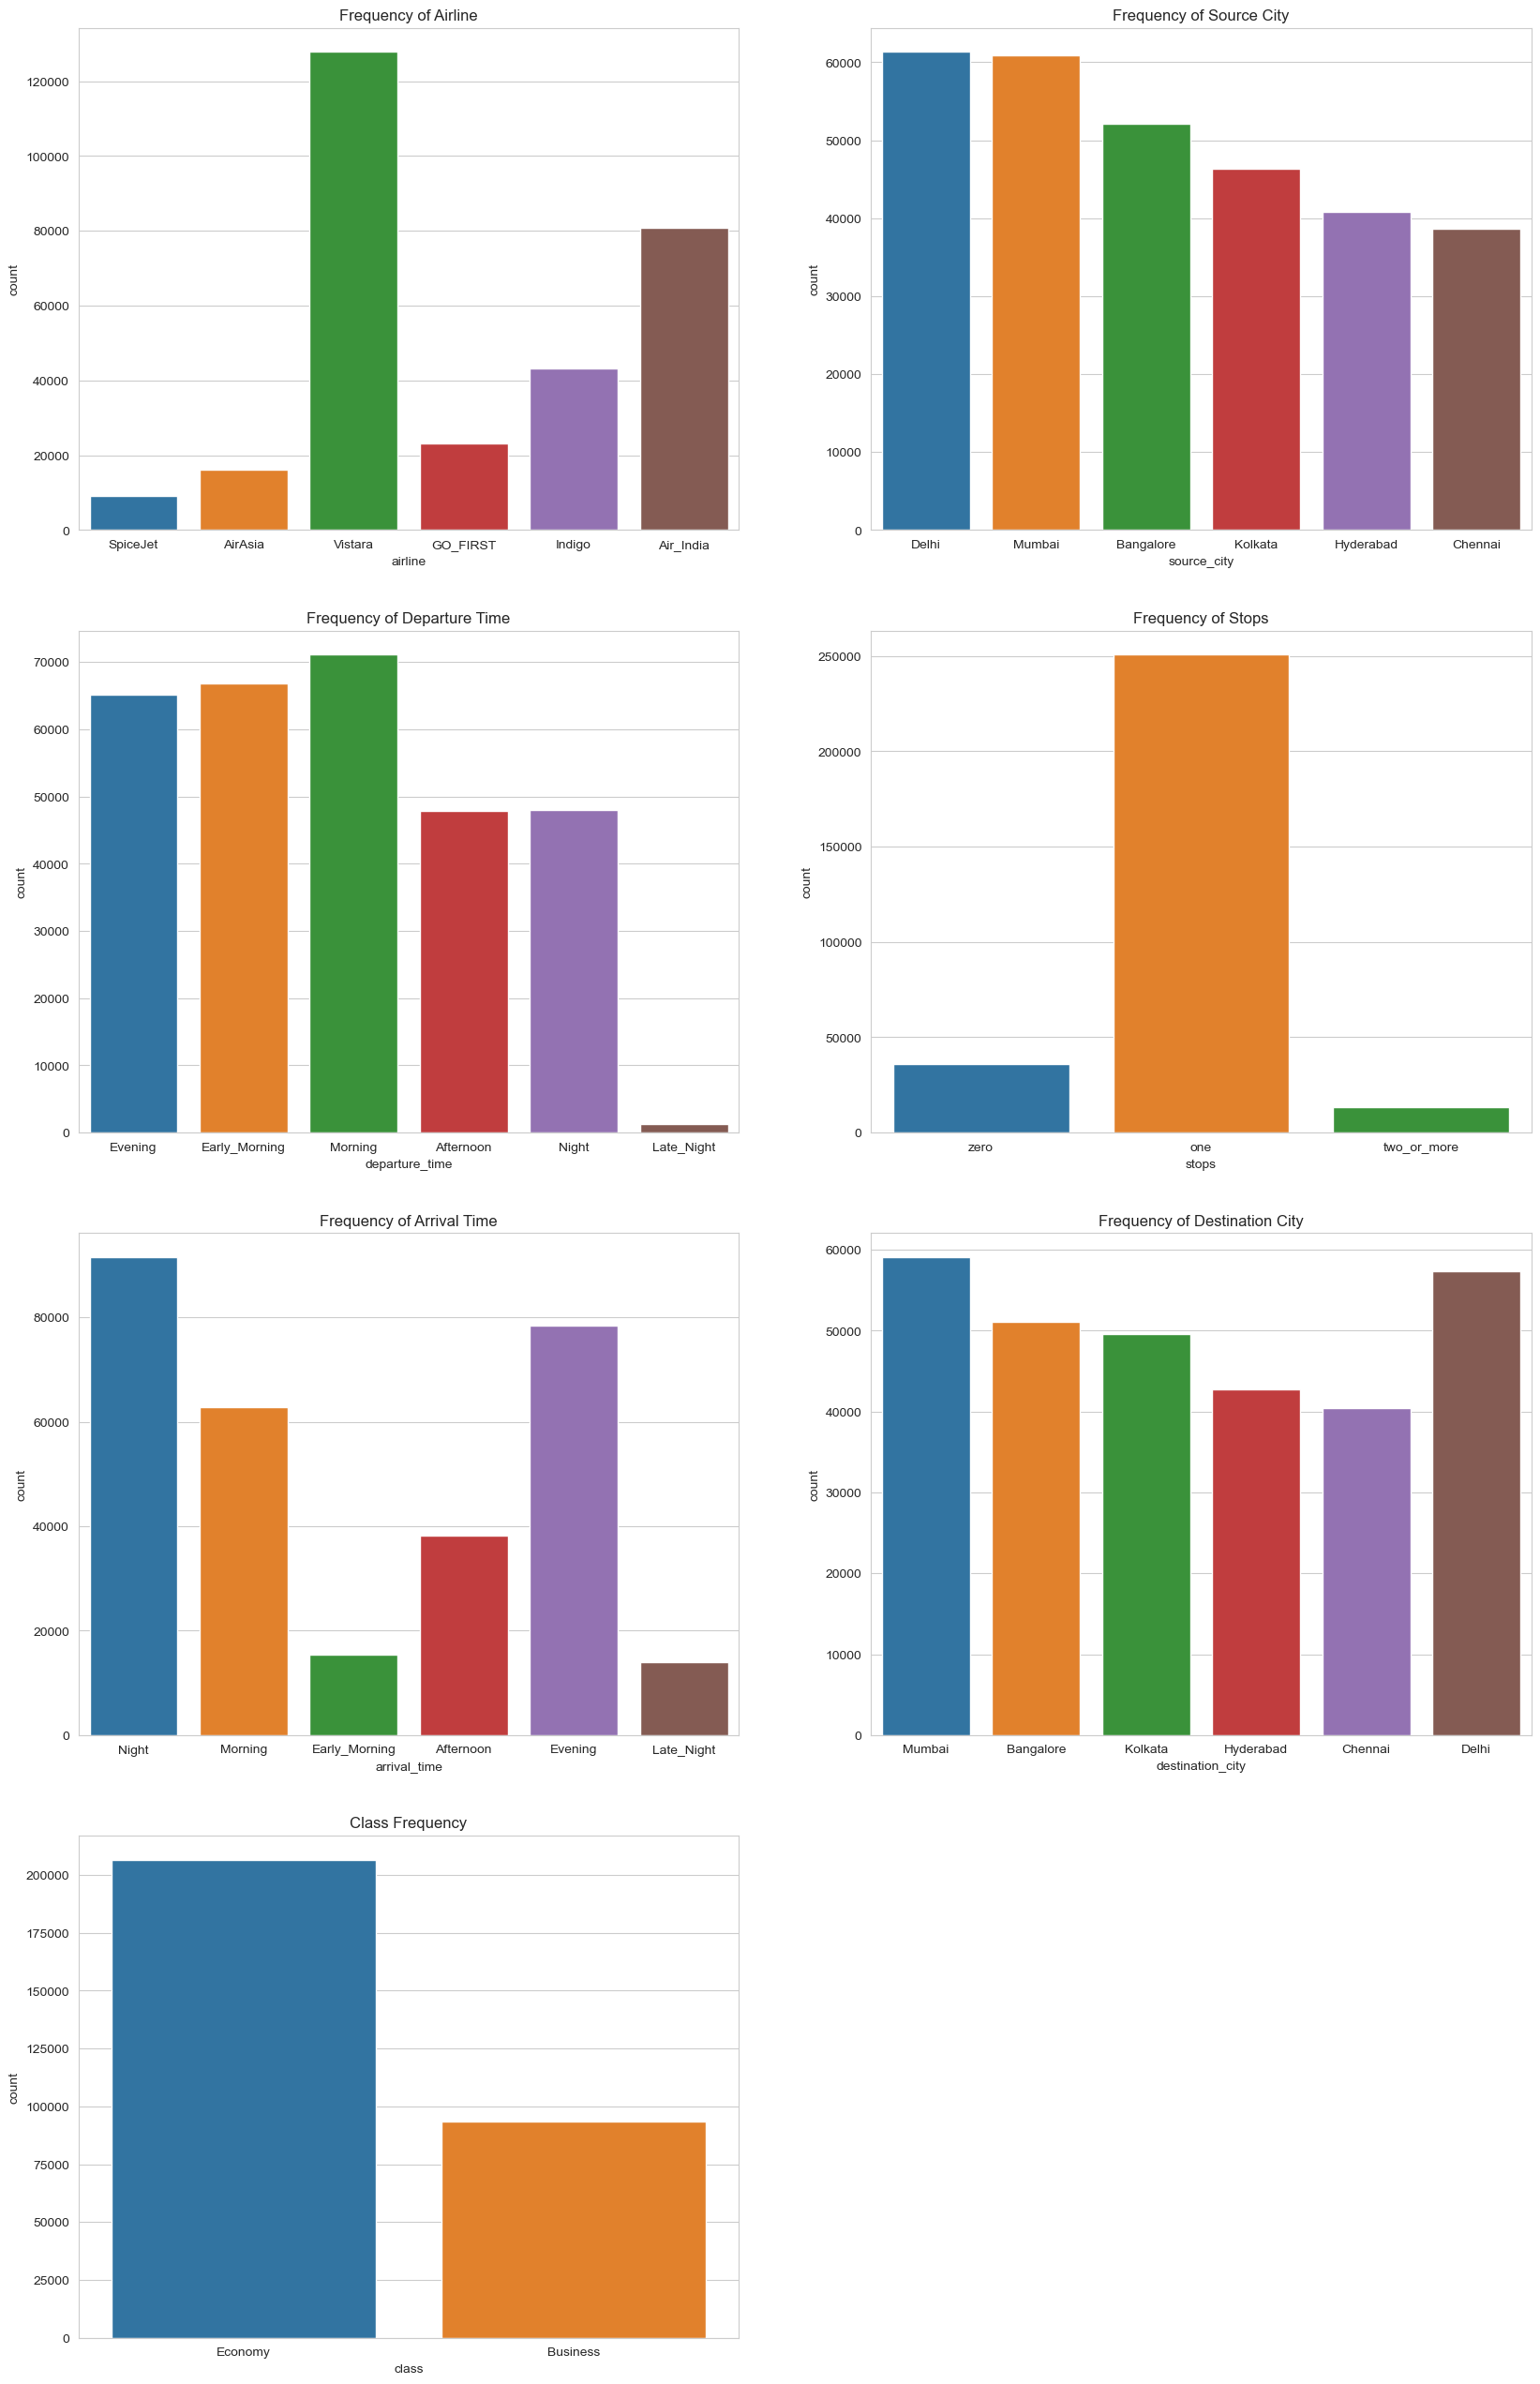

In [51]:
# Visualizations of categoric features with countplot
plt.figure(figsize=(20,32))

plt.subplot(4, 2, 1)
sns.countplot(x=df["airline"], data=df)
plt.title("Frequency of Airline")

plt.subplot(4, 2, 2)
sns.countplot(x=df["source_city"], data=df)
plt.title("Frequency of Source City")

plt.subplot(4, 2, 3)
sns.countplot(x=df["departure_time"], data=df)
plt.title("Frequency of Departure Time")

plt.subplot(4, 2, 4)
sns.countplot(x=df["stops"], data=df)
plt.title("Frequency of Stops")

plt.subplot(4, 2, 5)
sns.countplot(x=df["arrival_time"], data=df)
plt.title("Frequency of Arrival Time")

plt.subplot(4, 2, 6)
sns.countplot(x=df["destination_city"], data=df)
plt.title("Frequency of Destination City")

plt.subplot(4, 2, 7)
sns.countplot(x=df["class"], data=df)
plt.title("Class Frequency")

plt.show()

Numerical Variable Analysis

In [52]:
# Numeric features in dataframe
numeric_features = [column for column in df.columns if (df[column].dtype in ["int64", "float64"]) and (column not in categoric_features)]

df[numeric_features]

,duration,days_left,price
0,2.17,1,5953
1,2.33,1,5953
2,2.17,1,5956
3,2.25,1,5955
4,2.33,1,5955
...,...,...,...
300148,10.08,49,69265
300149,10.42,49,77105
300150,13.83,49,79099
300151,10.00,49,81585


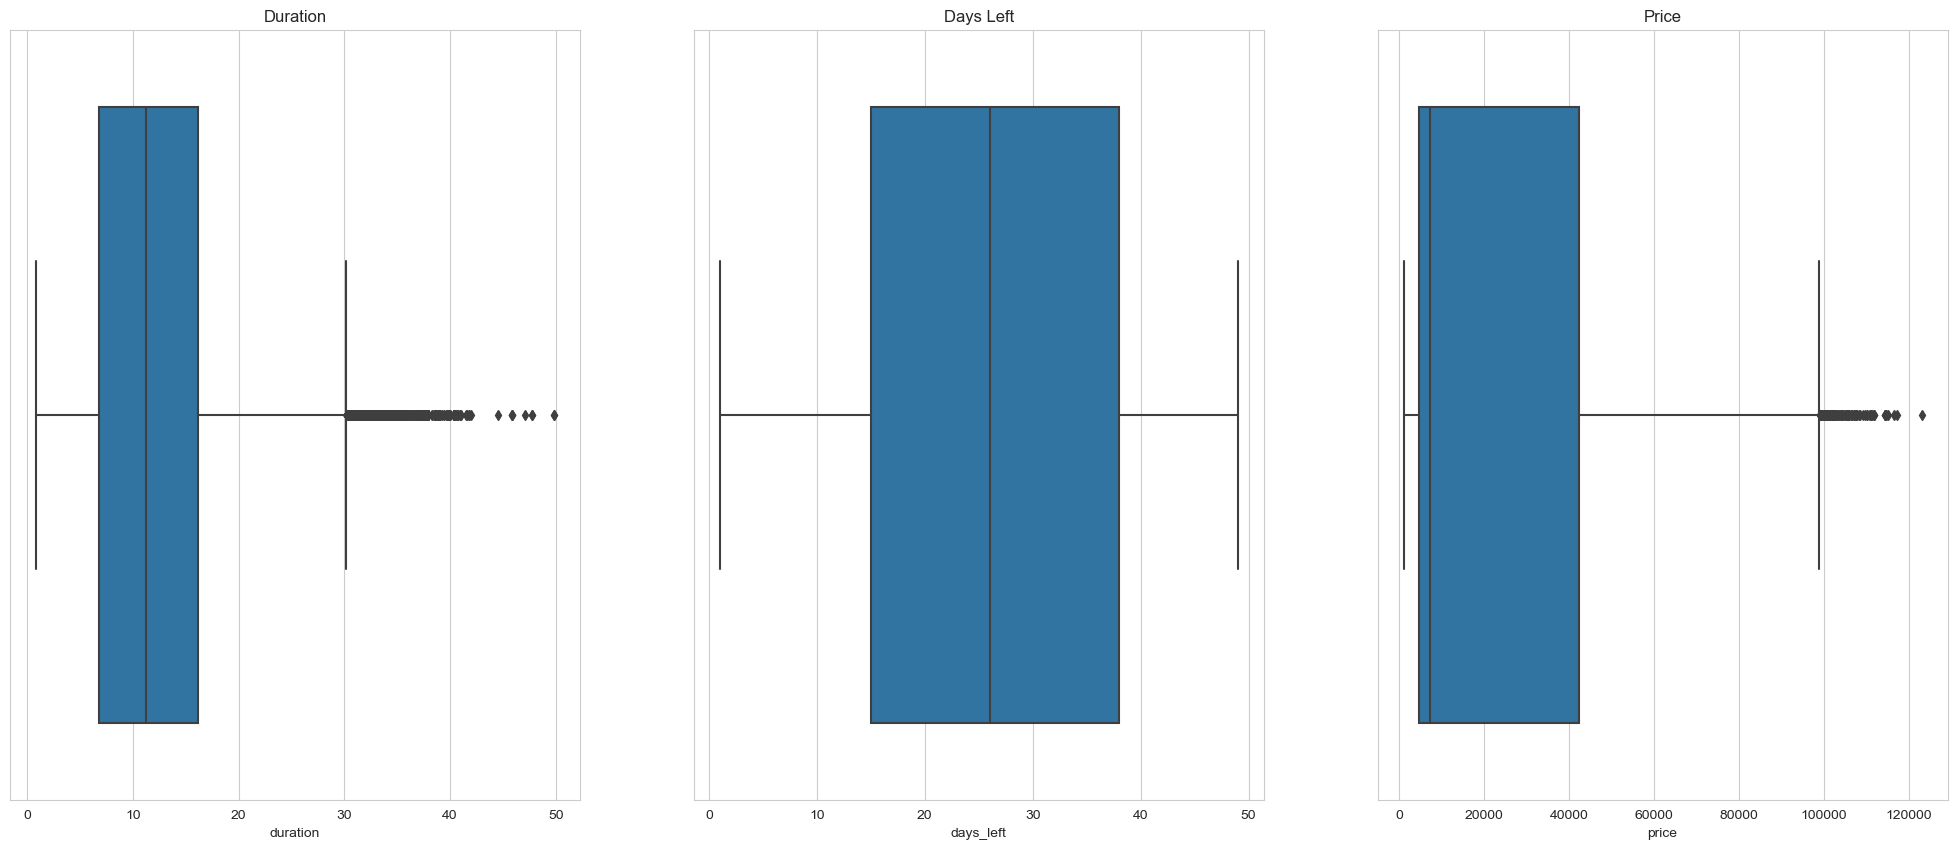

In [53]:
# Visualizations of numeric features with boxplot
plt.figure(figsize=(25,10))

plt.subplot(1, 3, 1)
sns.boxplot(x=df["duration"], data=df)
plt.title("Duration")

plt.subplot(1, 3, 2)
sns.boxplot(x=df["days_left"], data=df)
plt.title("Days Left")

plt.subplot(1, 3, 3)
sns.boxplot(x=df["price"], data=df)
plt.title("Price")

plt.show()

Target Variable Analysis

In [54]:
target = "price"

for feature in categoric_features:
    print("\n##################################")
    analysis = df.groupby(feature).agg({target : ["mean"]})
    print('Analysis with "{}":\n\n'.format(feature), analysis)


##################################
Analysis with "airline":

                   price
                   mean
airline                
AirAsia     4091.072742
Air_India  23507.019112
GO_FIRST    5652.007595
Indigo      5324.216303
SpiceJet    6179.278881
Vistara    30396.536302

##################################
Analysis with "source_city":

                     price
                     mean
source_city              
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839

##################################
Analysis with "departure_time":

                        price
                        mean
departure_time              
Afternoon       18179.203331
Early_Morning   20370.676718
Evening         21232.361894
Late_Night       9295.299387
Morning         21630.760254
Night           23062.146808

##################################
Analysis with "stops":

                     price
  

In [56]:
# If the correlation value is above 90%, I drop it
corr_matrix = df[numeric_features].corr().abs()
corr_upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype("bool"))
drop_list = [column for column in corr_upper_triangle_matrix.columns if any(corr_upper_triangle_matrix[column]>0.90)]

print("the length of drop list : ", len(drop_list))

the length of drop list :  0


In [62]:
df.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,5953,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,2.17,1,5956,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,5955,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
# Modeling
Y = df["price"]
X = df.drop(["price"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 7)

In [78]:
from sklearn.preprocessing import PolynomialFeatures

# create a polynomial features object of degree 2
poly = PolynomialFeatures(degree=3)

In [79]:

# transform the independent variables
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [80]:

# create a linear regression object
model = LinearRegression()

In [81]:
# fit the model on the training data
model.fit(X_train_poly, Y_train)

LinearRegression()

In [82]:
# predict the flight prices on the test data
y_pred = model.predict(X_test_poly)

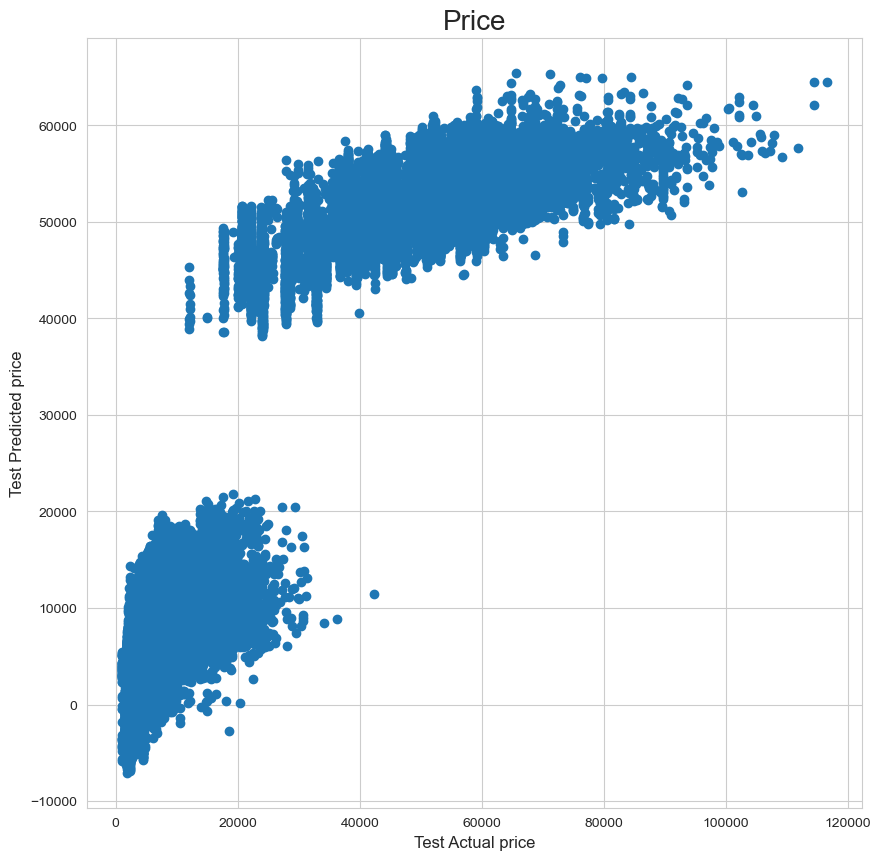

In [85]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_title("Price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(Y_test, Y_pred)
plt.show()

